In [19]:
%matplotlib inline
import ipywidgets as widgets
import gensim
import os
import matplotlib.pyplot as plt
import bidi.algorithm
import arabic_reshaper

## Word embedding model for arabic
This app allows you to find related words in a word embedding model for Arabic.

The current model is the Wikipedia CBOW model from [AraVec](https://github.com/bakrianoo/aravec), see: Abu Bakr Soliman, Kareem Eisa, and Samhaa R. El-Beltagy, “AraVec: A set of Arabic Word Embedding Models for use in Arabic NLP”, in proceedings of the 3rd International Conference on Arabic Computational Linguistics (ACLing 2017), Dubai, UAE, 2017.

In [3]:
model_path = 'data'

In [4]:
# To do: list multiple available models and only download them when needed
models = {}
filenames = os.listdir(model_path)
for fn in filenames:
    try:
        models[fn] = gensim.models.KeyedVectors.load(os.path.join(model_path, fn))
    except:
        pass

In [5]:
nicer_names_dict = {'wikipedia_cbow_100': 'Wikipedia',
                    'cbow-fiqh-100-wikipedia-finetuned-wv': 'Wikipedia+Fiqh',
                   'fiqh-i10-s100-w5-sg0_wv': 'Fiqh', 
                   'stemmed-fiqh-i10-s100-w5-sg0_wv': 'Stemmed Fiqh'}

In [6]:
models = {nicer_names_dict.get(model, model): models[model] for model in models}

In [7]:
def most_similar(word, model, topn=10):
    res = model.wv.most_similar(word, topn=topn)
    output = [u'{} \t{:.3f}'.format(w, s) for w, s in res]
    return '\n'.join(output)

In [56]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

def plot_embedding(word_list, model, method='pca'):
    X = model[word_list]
    if method is 'pca':
        X_embedded = PCA(n_components=2).fit_transform(X)
    else:
        X_embedded = TSNE(n_components=2, learning_rate=60).fit_transform(X)

    plt.figure(figsize=(15,15))
    plt.scatter(X_embedded[:,0], X_embedded[:,1])
    plt.axis('off')
    for i, w in enumerate(word_list):
        display_word = bidi.algorithm.get_display(arabic_reshaper.reshape(w))
        plt.annotate(display_word, xy=(X_embedded[i, 0], X_embedded[i, 1]), fontsize=20)
    plt.show()

In [57]:
def plot_closest_words(word, model, method='pca', topn=30):
    word_list = [w for w, s in model.wv.most_similar(word, topn=topn)]
    word_list.append(word)
    plot_embedding(word_list, model, method)

/home/dafne/anaconda2/envs/adh/lib/python3.6/site-packages/ipykernel/__main__.py:2: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  from ipykernel import kernelapp as app


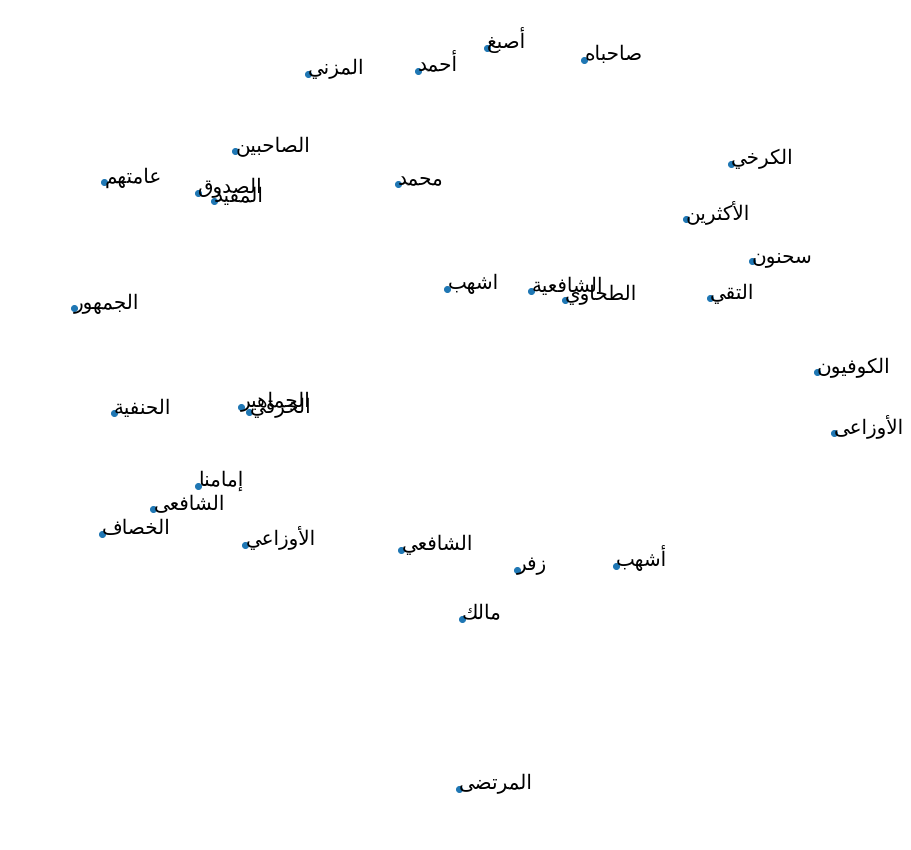

In [58]:
model = models['Fiqh']
word = 'الشافعي'
plot_closest_words(word, model, method='tsne', topn=30)

/home/dafne/anaconda2/envs/adh/lib/python3.6/site-packages/ipykernel/__main__.py:2: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  from ipykernel import kernelapp as app


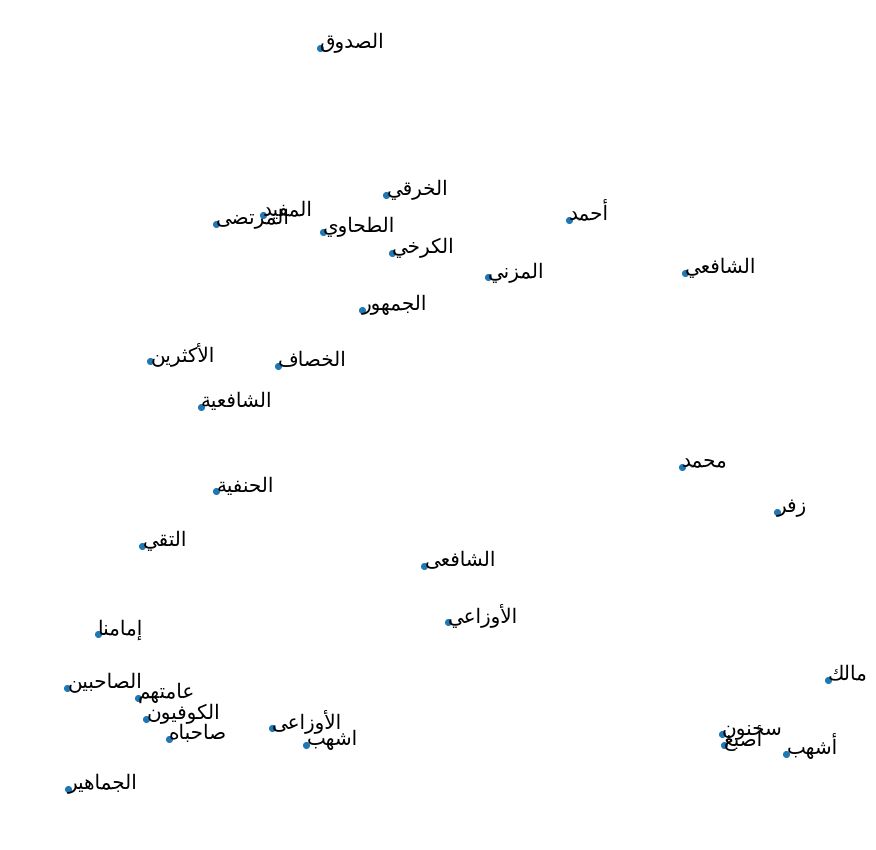

In [41]:
model = models['Fiqh']
word = 'الشافعي'
plot_closest_words(word, model, method='pca', topn=30)